In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [12]:
import DataStore
from matplotlib import pyplot as plt

ds = DataStore.DataStore("data", 25)

In [13]:
ds.trainData['A-3'].x[2056]

array([[0.11308108, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3336605 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3336605 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [4]:
ds.trainData['A-3'].y[2056]

array([0.76934069, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [47]:
loaded_model = tf.keras.models.load_model('models/experimental/A-3.h5')

In [15]:
loaded_model.layers

In [48]:
preds = loaded_model.predict(ds.testData['A-3'].x*100)

In [49]:
preds.shape

(8180, 25, 1)

In [50]:
ds.testData['A-3'].y.shape

(8180, 25)

In [51]:
y = ds.testData['A-3'].y.reshape(8180,1,25)*100
y.shape

(8180, 1, 25)

In [21]:
from Utils import get_e, rmse, mae, classify_pl, make_discrete_lbls, vectorize_labels
import os



In [52]:
lbls = make_discrete_lbls(os.path.join("data", "labeled_anomalies.csv"))
lbls['A-3']

[(4575, 4760)]

In [64]:
pls = classify_pl(preds, y, 500)

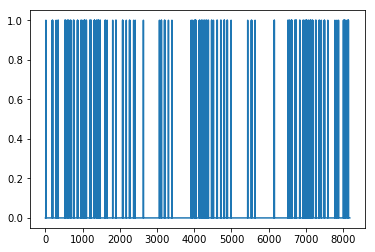

In [65]:
plt.plot(pls)

In [66]:
e = []
for i,j in zip(y, preds):
    e.append(rmse(i,j))
e = np.array(e)

In [42]:
lb = vectorize_labels(lbls['A-3'], preds.shape[0])

In [27]:
import matplotlib.pyplot as plt


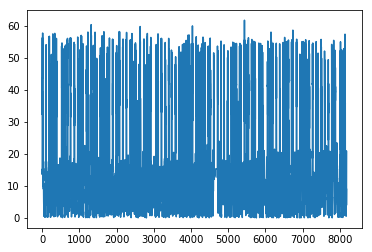

In [60]:
plt.plot(e)

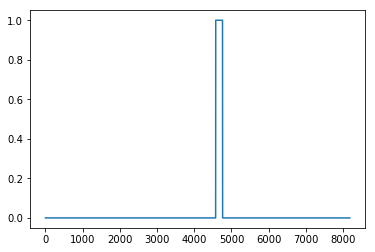

In [61]:
plt.plot(lb)

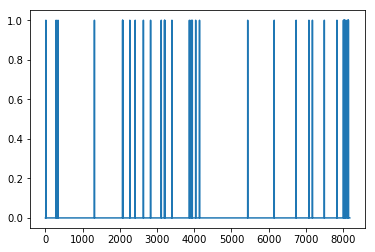

In [62]:
plt.plot(pls)

In [30]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(lb, pls, target_names=["false", "true"]))

              precision    recall  f1-score   support

       false       0.98      0.98      0.98      7995
        true       0.02      0.02      0.02       185

    accuracy                           0.96      8180
   macro avg       0.50      0.50      0.50      8180
weighted avg       0.96      0.96      0.96      8180



In [104]:
y_true = [1, 1, 1, 1, 1]
y_pred = [1, 1, 0, 1, 1]

In [105]:
target_names = ['false', 'true']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       false       0.00      0.00      0.00         0
        true       1.00      0.80      0.89         5

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5



/Users/juanrodriguez/PycharmProjects/pythonProject1/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanrodriguez/PycharmProjects/pythonProject1/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanrodriguez/PycharmProjects/pythonProject1/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_